# Data Exploration - Pre-Preparation

### Project Overview

#### Data Source

The information utilized in this project was obtained from the Kaggle dataset titled `Rain in Australia`.

#### Problem

In this work assignment we attempt to create a model that gives an accurate predition of the weather the next day in Australia.
Fundamentally, accurate weather forecasts affect security, economics, agriculture, travel, energy, environment and personal lifestyle decisions. Its importance lies in its far-reaching impact across multiple sectors, enabling better planning, resource management and risk reduction. For example: 

- For safety and disaster preparedness: Accurate forecasts can save lives and reduce damage by providing early warning and preparation for extreme weather events such as hurricanes, storms or heat waves; 
- For agriculture and food security: Farmers rely on weather forecasts for crop planning, irrigation and pest control. Forecasts help improve yields and ensure food security.

### Features Description

According to the author of the Kaggle dataset, the meanings and units for each of the features in the dataset are the following:

| **Column Name** | **Definition** | **Units** |
| --------------- | -------------- | --------- |
| `Date` | Date of the observation | N/A |
| `Location` | Location of the weather station | N/A |
| `MinTemp` | Minimum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree | Degrees Celsius |
| `MaxTemp` | Maximum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree | Degrees Celsius |
| `Rainfall` | Precipitation (rainfall) in the 24 hours to 9am. Sometimes only known to the nearest whole millimeter | Millimeters |
| `Evaporation` | "Class A" pan evaporation in the 24 hours to 9am | Millimeters |
| `Sunshine` | Bright sunshine in the 24 hours to midnight | Hours |
| `WindGustDir` | Direction of the strongest wind gust in the 24 hours to midnight | 16 compass points |
| `WindGustSpeed` | Speed of the strongest wind gust in the 24 hours to midnight | Kilometers per hour |
| `WindDir9am` | Direction of the wind at 9am | 16 compass points |
| `WindDir3pm` | Direction of the wind at 3pm | 16 compass points |
| `WindSpeed9am` | Speed of the wind at 9am | Kilometers per hour |
| `WindSpeed3pm` | Speed of the wind at 3pm | Kilometers per hour |
| `Humidity9am` | Relative humidity at 9am | Percent |
| `Humidity3pm` | Relative humidity at 3pm | Percent |
| `Pressure9am` | Atmospheric pressure reduced to mean sea level at 9am | Hectopascals |
| `Pressure3pm` | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascals |
| `Cloud9am` | Fraction of sky obscured by cloud at 9am | Eighths |
| `Cloud3pm` | Fraction of sky obscured by cloud at 3pm | Eighths |
| `Temp9am` | Temparature at 9am | Degrees Celsius |
| `Temp3pm` | Temparature at 3am | Degrees Celsius |
| `RainToday` | Did the current day receive precipitation exceeding 1mm in the 24 hours to 9am | Binary (0 = No, 1 = Yes) |
| `RainTomorrow` | Did the next day receive precipitation exceeding 1mm in the 24 hours to 9am | Binary (0 = No, 1 = Yes) |

### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
%matplotlib inline

### Read Data

In [2]:
df = pd.read_csv('../../../datasets/parte1/weatherAUS.csv')

### Data Preview

Upon receiving an unfamiliar dataset, the immediate question that arises is: What type of data are we dealing with?

In order to effectively manage future machine learning tasks, it is crucial to have a thorough grasp of our data.
Typically, we begin by characterizing the data in terms of the number of observations, types of features, overall missing rate, and percentage of duplicate observations.

### Data overview

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### Number of observations and features

In [4]:
df.shape

(145460, 23)

### Features types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

#### Missing rates (%)

In [6]:
df.isna().mean() * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

#### Percentage of duplicated values

In [7]:
df.duplicated().mean() * 100

0.0

#### Search for duplicated Location and Date pairs

We want to guarantee that there is only one entry each day for each location

In [8]:
location_date_counts = df.groupby(['Location', 'Date']).size()

print(location_date_counts[location_date_counts > 1].index)

MultiIndex([], names=['Location', 'Date'])


### General Statistics

The following statistics help understand the typical range, variability, and central tendency of various weather parameters. They provide information about the distribution of weather conditions in the dataset, thereby guiding further analysis or modeling in weather forecasting.

In [30]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Based on these statistics: 

- `Temperature range:` The lowest recorded temperature range is -8.5°C to 33.9°C and the highest temperature range is - .8°C to 8.1°C. This indicates that there is a wide range of temperature variations in the dataset; 
- `Precipitation:` The average precipitation is 2.36 mm, and the maximum is 371 mm. Most recorded values ​​(75th percentile) are below 0.8 mm, indicating a large proportion of days with little or no precipitation;
- `Evaporation and sunlight:` There are statistically significant differences between the maximum values ​​of evaporation (1 5 mm), sunshine hours (1 .5 hours) and the highest spring (75%), indicating the presence of possible abnormal weather conditions or extremes;
- `Wind speed:` ranges between 6 km/h and 135 km/h. Average wind speeds at 9:00 AM and 3:00 PM were 13 km/h and 19 km/h, respectively, indicating average moderate wind conditions; 
- `Humidity:` There was a significant difference in humidity levels between 9:00 AM and 3:00 PM, with humidity levels higher in the morning (average 68.9%) than in the afternoon (average 51.5 %);
- `Atmospheric pressure:` The mean pressure readings at 9:00 and 15:00 were 1017.6 hPa and 1015.3 hPa, respectively, with relatively constant interquartile ranges, showing a stable pressure distribution. 

### Missing Values by Feature

The count of the missing values in our dataset is made because it provides insight into data integrity, aids in decision-making for data cleaning strategies and ensures the reliability of analyses and models built upon the dataset.

In [10]:
print(df.isna().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


The breakdown assists in identifying which columns contain missing data and the degree to which they are affected. In our dataset:

- The columns `Evaporation`, `Sunshine`, `Cloud9am`, and `Cloud3pm` contain a significant amount of missing data, suggesting potential gaps in the accuracy of these variables.
- The columns `MinTemp`, `MaxTemp`, `Rainfall`, etc, have also a few missing values, but less than the previously mentioned columns.

This analysis provides us with the information needed to make educated choices when dealing with missing data. 
Our objective is to handle missing values in a way that is appropriate for the context of our analysis, ensuring data integrity and avoiding bias in the results. 

### Numeric Features Distribution

<Axes: xlabel='Temp3pm', ylabel='Count'>

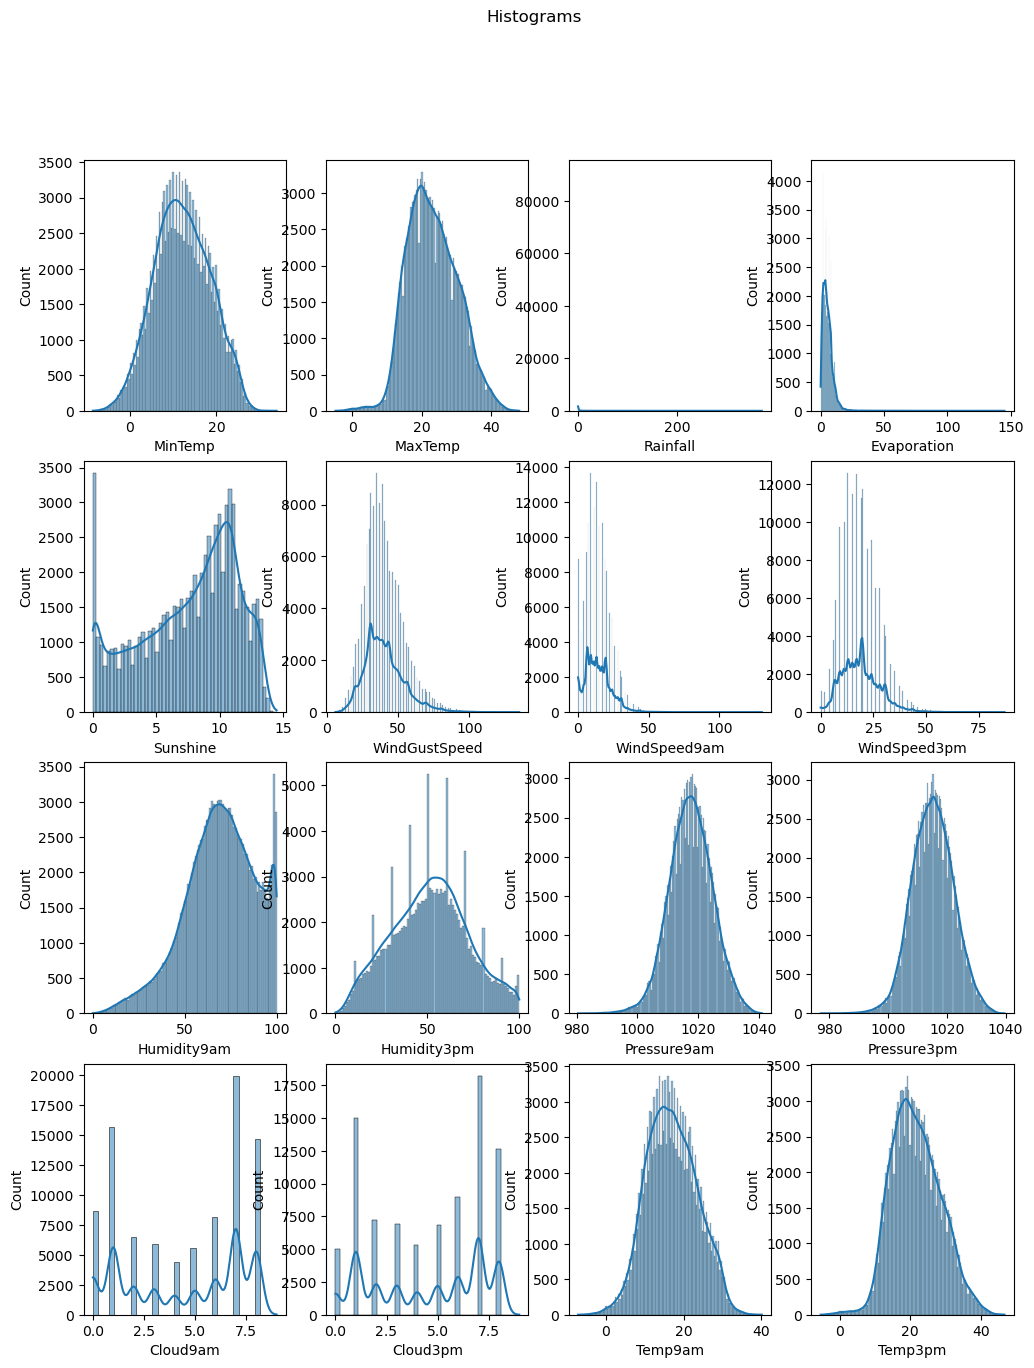

In [11]:
fig, axs = plt.subplots(4, 4, figsize=(12, 15))
fig.suptitle("Histograms")

sns.histplot(df["MinTemp"], ax=axs[0,0], kde=True)
sns.histplot(df["MaxTemp"], ax=axs[0,1], kde=True)
sns.histplot(df["Rainfall"], ax=axs[0,2], kde=True)
sns.histplot(df["Evaporation"], ax=axs[0,3], kde=True)
sns.histplot(df["Sunshine"], ax=axs[1,0], kde=True)
sns.histplot(df["WindGustSpeed"], ax=axs[1,1], kde=True)
sns.histplot(df["WindSpeed9am"], ax=axs[1,2], kde=True)
sns.histplot(df["WindSpeed3pm"], ax=axs[1,3], kde=True)
sns.histplot(df["Humidity9am"], ax=axs[2,0], kde=True)
sns.histplot(df["Humidity3pm"], ax=axs[2,1], kde=True)
sns.histplot(df["Pressure9am"], ax=axs[2,2], kde=True)
sns.histplot(df["Pressure3pm"], ax=axs[2,3], kde=True)
sns.histplot(df["Cloud9am"], ax=axs[3,0], kde=True)
sns.histplot(df["Cloud3pm"], ax=axs[3,1], kde=True)
sns.histplot(df["Temp9am"], ax=axs[3,2], kde=True)
sns.histplot(df["Temp3pm"], ax=axs[3,3], kde=True)

As we can see, most parameters, such as `MinTemp`, `MaxTemp`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Temp9am` and `Temp3pm` are distributed normally as expected. However, there are some features that need further study:

- The distribution of `Rainfall` has large outliers that affect the ability to represent the data.
- The `Evaporation` shows a right-skewed distribuition, with most days having lower evaporation rates and fewer days with very high evporation;
- The `Sunshine` distribution is interesting, but pretty self-explanatory. That is, high frequency values ​​of 0 mean that´s cloudy all day on those especific days and, on the other hand, the frequency drops sharply after 10 am, reflecting the limited amount of daylight that lasts several hours or more each year;
- The `WindGustSpeed` shows that most days are experiencing moderate wind speeds and only a few days with extremely high wind gusts.
- The `Humidity9am` distribution is particularly interesting due to the sharp increase in frequency approaching 100%;
- The `Cloud9am/Cloud3pm` distributions of cloud cover can be varied. It might show multiple modes depending on typical weather patterns, like clear skies, partly cloudy, or overcast conditions.


Since the summary statistics section shows that the 25th and 75th percentiles for the `Rainfall`  property is only 0 and 0.8, the following image shows the distribution of values ​​between 0 and 1.

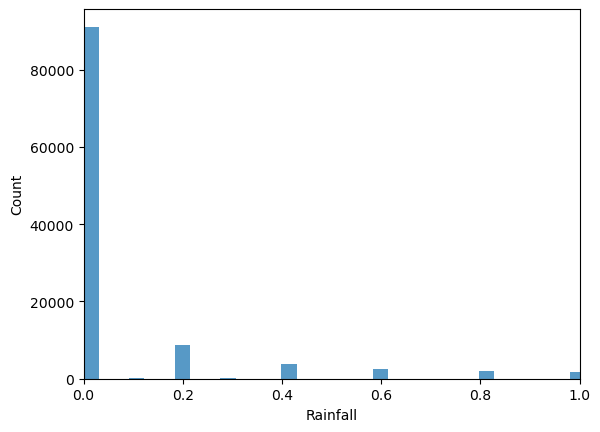

In [12]:
sns.histplot(df.Rainfall)
plt.xlim(0, 1);

As we can see, there are elevated values on 0% of rainfall, that means that most of the days doesn´t rain all day long. 

### Outliers

<Axes: ylabel='Temp3pm'>

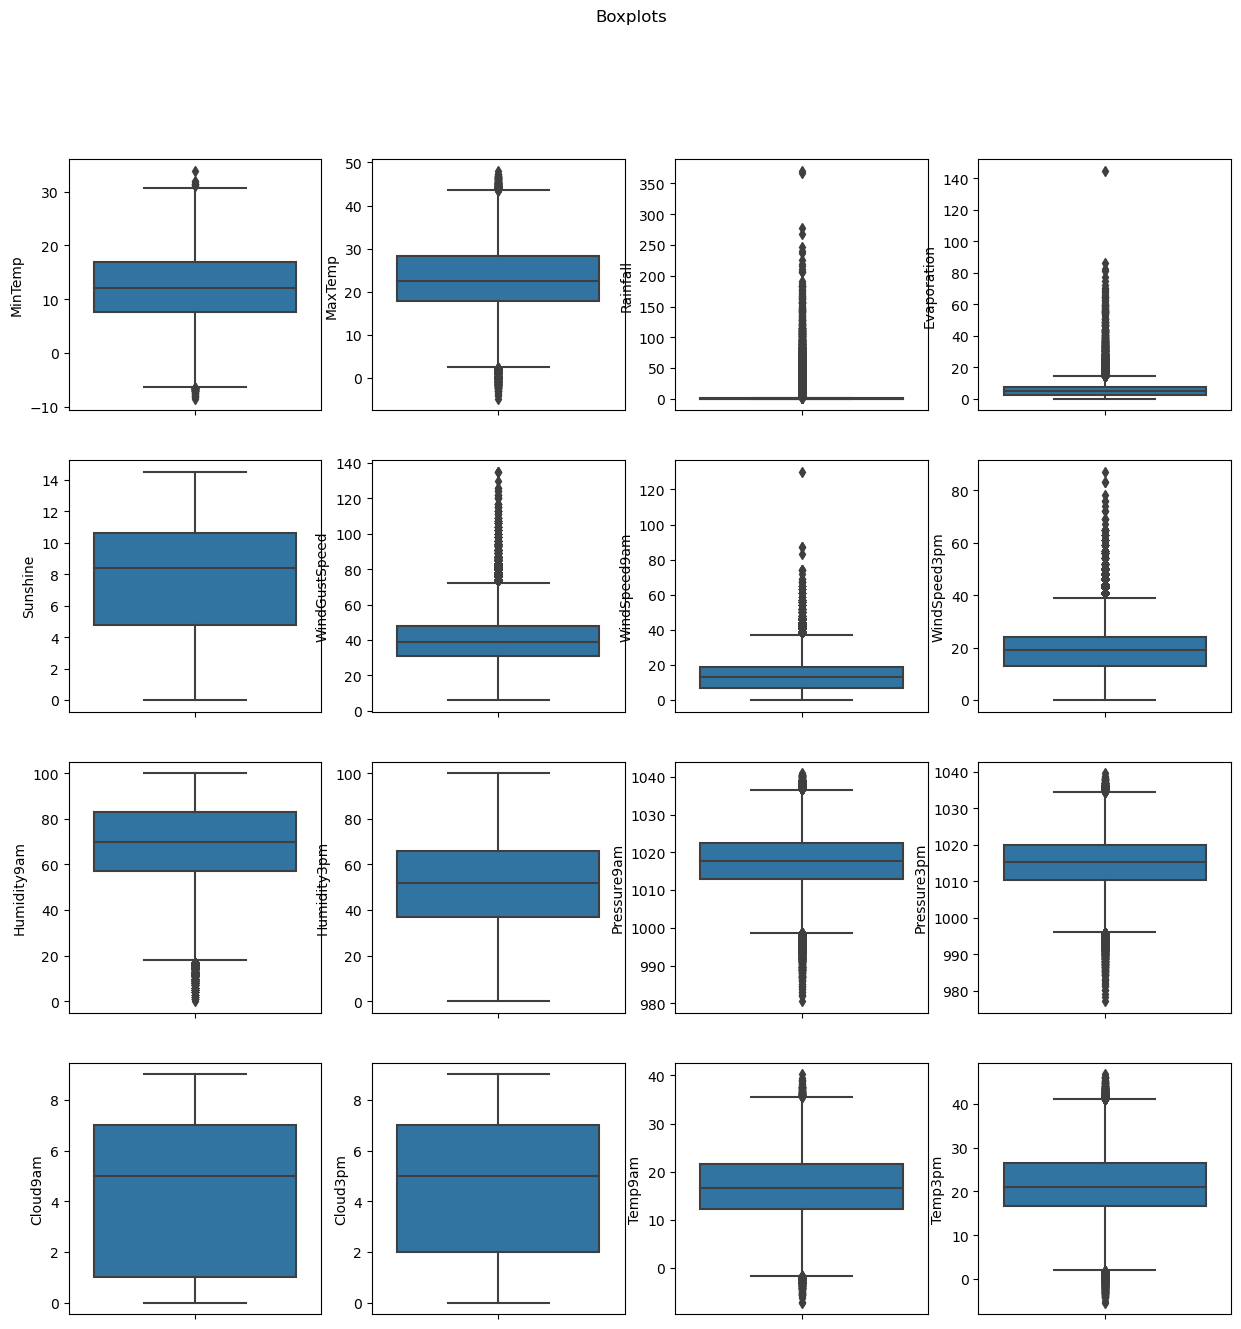

In [13]:
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
fig.suptitle("Boxplots")

sns.boxplot(y=df["MinTemp"], ax=axs[0,0])
sns.boxplot(y=df["MaxTemp"], ax=axs[0,1])
sns.boxplot(y=df["Rainfall"], ax=axs[0,2])
sns.boxplot(y=df["Evaporation"], ax=axs[0,3])
sns.boxplot(y=df["Sunshine"], ax=axs[1,0])
sns.boxplot(y=df["WindGustSpeed"], ax=axs[1,1])
sns.boxplot(y=df["WindSpeed9am"], ax=axs[1,2])
sns.boxplot(y=df["WindSpeed3pm"], ax=axs[1,3])
sns.boxplot(y=df["Humidity9am"], ax=axs[2,0])
sns.boxplot(y=df["Humidity3pm"], ax=axs[2,1])
sns.boxplot(y=df["Pressure9am"], ax=axs[2,2])
sns.boxplot(y=df["Pressure3pm"], ax=axs[2,3])
sns.boxplot(y=df["Cloud9am"], ax=axs[3,0])
sns.boxplot(y=df["Cloud3pm"], ax=axs[3,1])
sns.boxplot(y=df["Temp9am"], ax=axs[3,2])
sns.boxplot(y=df["Temp3pm"], ax=axs[3,3])

As we can see from the boxplot there are some variables that tend to have some outliers who need to be consider, such as: Evaporation, WindGustSpeed, Pressure3pm/Pressure9am, etc.
Handling outliers involves careful consideration. Depending on the situation, outliers might need to be:
- Investigated further to understand their nature and potential impact.
- Adjusted or transformed, if they are genuine nothing but extreme observations.
- Removed, if they are the result of errors or measurement issues.
- Addressed through robust statistical methods that are less sensitive to outliers.

In summary, outliers are important as they can provide insights, influence analysis, and impact the interpretation and reliability of models. Understanding and appropriately managing outliers is essential for accurate and meaningful data analysis.

### Categorical Features Distribution

#### Location

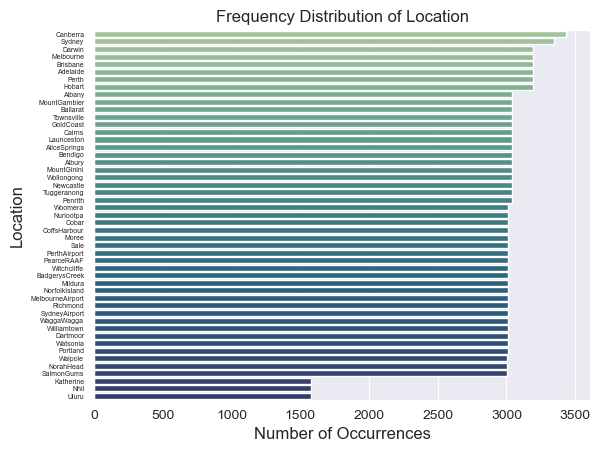

In [14]:
location_count = df['Location'].value_counts()
sns.set_style('darkgrid')
sns.barplot(x=location_count.values, y=location_count.index, orient='h', palette='crest')
plt.title('Frequency Distribution of Location')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.yticks(fontsize=5)
plt.show()

#### WindGustDir

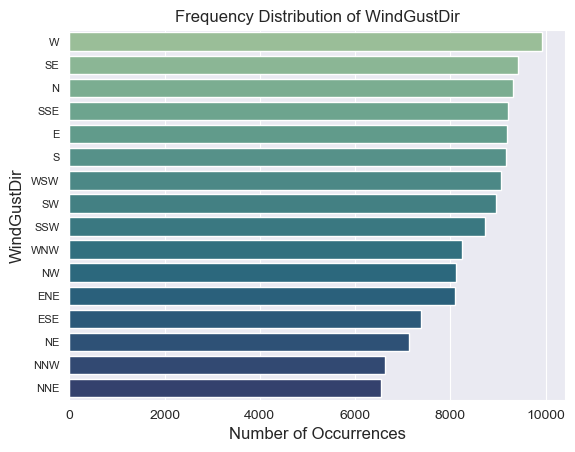

In [15]:
windgustdir_count = df['WindGustDir'].value_counts()
sns.set_style('darkgrid')
sns.barplot(x=windgustdir_count.values, y=windgustdir_count.index, orient='h', palette='crest')
plt.title('Frequency Distribution of WindGustDir')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('WindGustDir', fontsize=12)
plt.yticks(fontsize=8)
plt.show()

#### WindDir9am

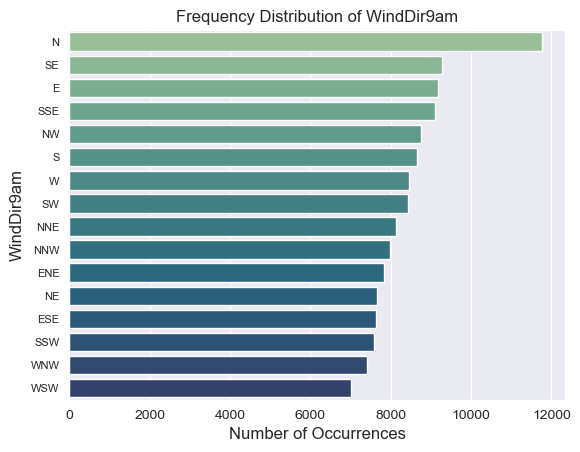

In [16]:
winddir9am_count = df['WindDir9am'].value_counts()
sns.set_style('darkgrid')
sns.barplot(x=winddir9am_count.values, y=winddir9am_count.index, orient='h', palette='crest')
plt.title('Frequency Distribution of WindDir9am')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('WindDir9am', fontsize=12)
plt.yticks(fontsize=8)
plt.show()

#### WindDir3pm

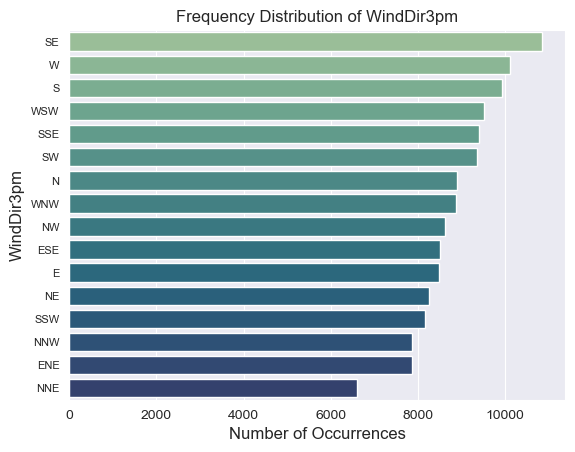

In [17]:
winddir3pm_count = df['WindDir3pm'].value_counts()
sns.set_style('darkgrid')
sns.barplot(x=winddir3pm_count.values, y=winddir3pm_count.index, orient='h', palette='crest')
plt.title('Frequency Distribution of WindDir3pm')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('WindDir3pm', fontsize=12)
plt.yticks(fontsize=8)
plt.show()

#### RainToday

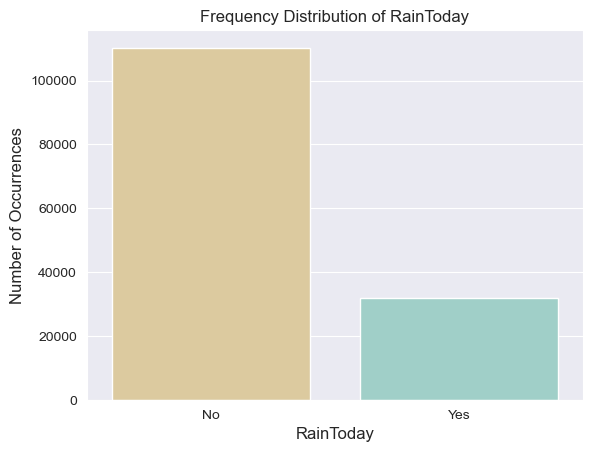

In [18]:
raintoday_count = df['RainToday'].value_counts()
sns.set_style('darkgrid')
sns.barplot(x=raintoday_count.index, y=raintoday_count.values, palette='BrBG')
plt.title('Frequency Distribution of RainToday')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('RainToday', fontsize=12)
plt.show()

#### RainTomorrow

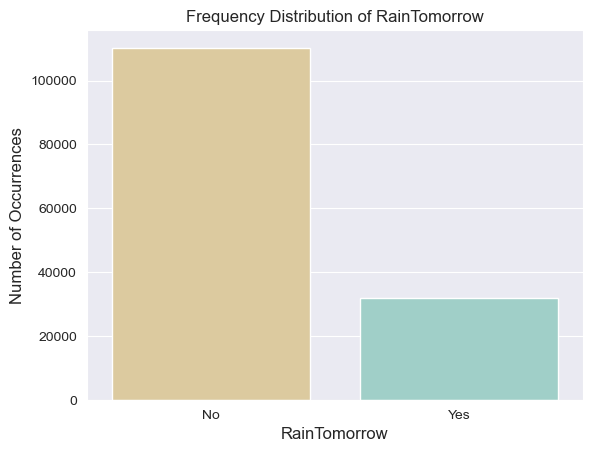

In [19]:
raintomorrow_count = df['RainTomorrow'].value_counts()
sns.set_style('darkgrid')
sns.barplot(x=raintomorrow_count.index, y=raintomorrow_count.values, palette='BrBG')
plt.title('Frequency Distribution of RainTomorrow')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('RainTomorrow', fontsize=12)
plt.show()

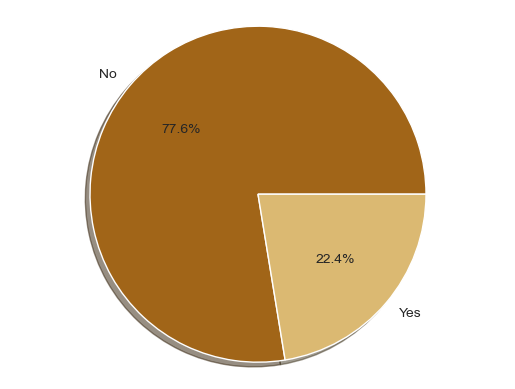

In [20]:
labels = df['RainTomorrow'].astype('category').cat.categories.tolist()
counts = df['RainTomorrow'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors=sns.color_palette('BrBG'))
ax1.axis('equal')
plt.show()

The probability of raining is extremely lower than the probabily of not raining, so we are dealing with imbalanced classes. As this is our target feature, this is a problem because our models may become biased towards the majority class.

### Overall Correlation


In this section we analise the correlation between variables. Correlation is crucial in analysing this dataset for several reasons, such as:
- Relationship Identification: Correlation measures the strength and direction of the relationship between two variables. It helps identify how changes in one variable relate to changes in another.
- Feature Selection: Correlation analysis will be used to select relevant features. Highly correlated variables might provide redundant information, and eliminating one of them can simplify models without losing predictive power.

In order to see the correlation between variables we beggin by replacing categorical values in the columns `RainToday` and `RainTomorrow` with numerical equivalents, preparing the categorical data for training and analysis. Then, we beggin to analyse the correlation between those variables.

In [21]:
df_copy = df.copy()
replace_map = {"RainToday": {"Yes": 1, "No": 0}}
labels = df_copy["RainToday"].astype('category').cat.categories.tolist()
replace_map_comp = {'RainToday' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df_copy.replace(replace_map_comp, inplace=True)

replace_map = {"RainTomorrow": {"Yes": 1, "No": 0}}
labels = df_copy["RainTomorrow"].astype('category').cat.categories.tolist()
replace_map_comp = {'RainTomorrow' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df_copy.replace(replace_map_comp, inplace=True)

<Axes: >

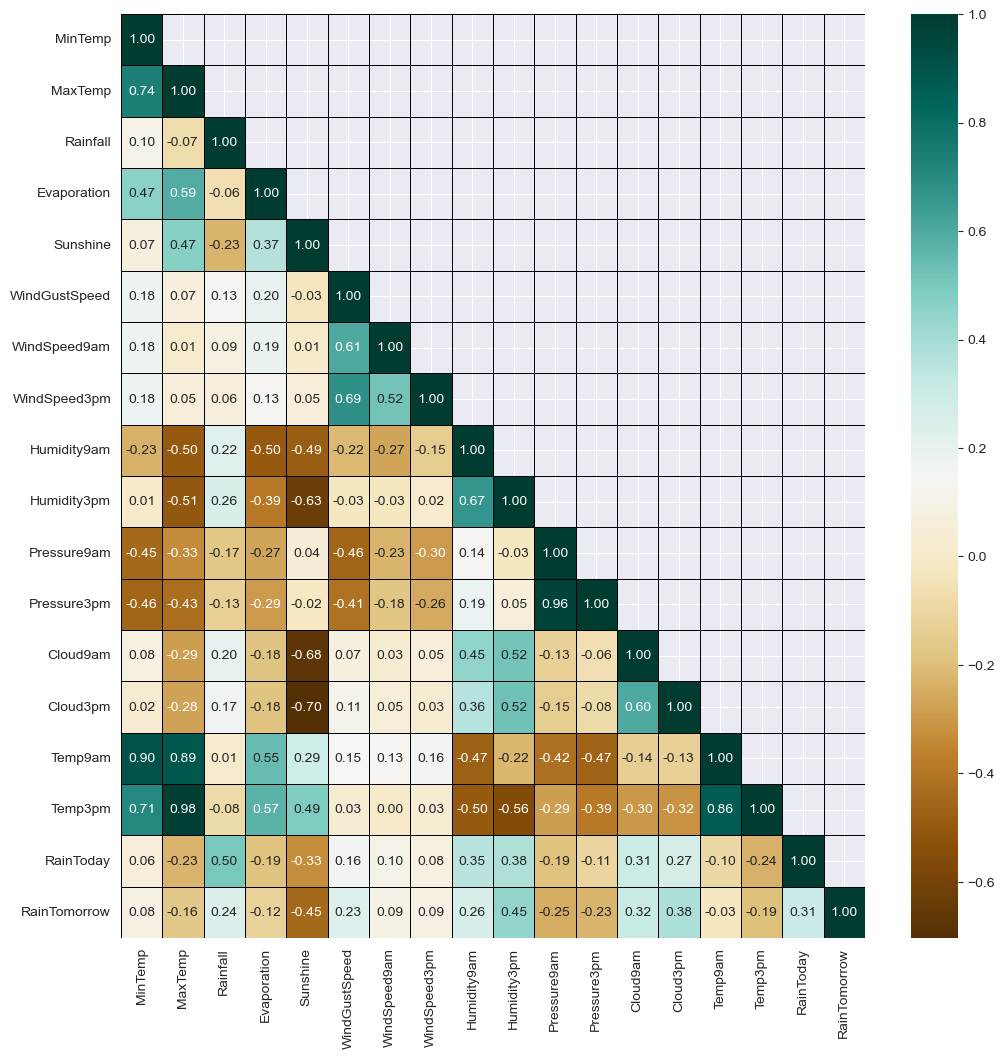

In [22]:
fig = plt.figure(figsize=(12, 12))
correlation_matrix = df_copy.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, linecolor='black', linewidths=0.5, annot=True, cmap='BrBG', fmt='.2f', mask=np.triu(np.ones_like(correlation_matrix), k=1))

In this case, the correlations close to 1 (>0.8) are: `MinTemp-Temp9am; MaxTemp-Temp9am; MaxTemp-Temp3pm; Press9am-Press3pm; Temp9am-Temp3pm; Temp3pm-MinTemp; Temp9am-MaxTemp and Temp3pm-MaxTemp`. That indicates a robust and strong relationship between the variables, suggesting a consistent and predictable pattern in their behavior (strong positive linear association).

**Observations:**
While a high correlation coefficient suggests a strong relationship, it's important to remember that correlation doesn't imply causation. Just because two variables are strongly correlated doesn't necessarily mean that changes in one variable cause changes in the other. Given that, in this dataset we can say that the features with high correlation have intuitive reasons for being so.







### Correlation Analysis between Features

#### Humidity and Rain

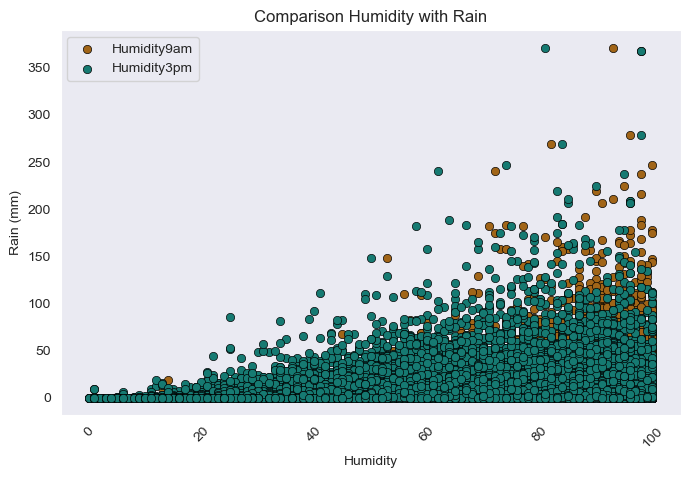

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(x=df['Humidity9am'], y=df['Rainfall'], color=sns.color_palette('BrBG')[0], label='Humidity9am', edgecolor='black')
sns.scatterplot(x=df['Humidity3pm'], y=df['Rainfall'], color=sns.color_palette('BrBG')[5], label='Humidity3pm', edgecolor='black')
plt.title("Comparison Humidity with Rain")
plt.xlabel('Humidity')
plt.ylabel('Rain (mm)')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid()
plt.show()

As we can see, the possibility of rain isn´t that most correlated to the possibility of existing humidity throughout the day, wich can be shown by the lack of a linear association in this graphic or by the low correlation coeficient (0.22 and 0.26).

#### Hourly Features

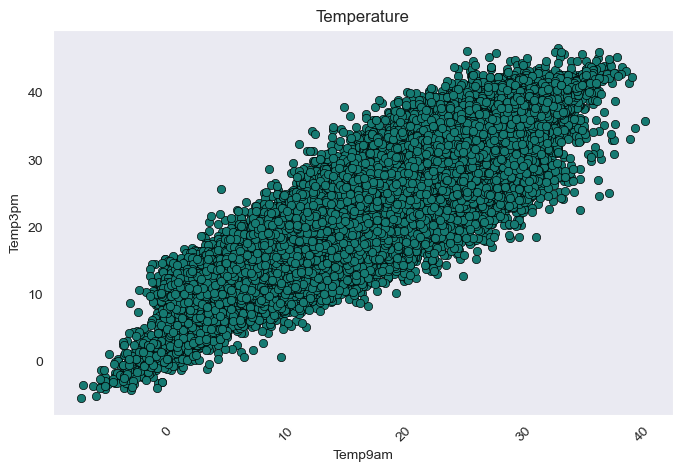

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Temp9am'], y=df['Temp3pm'], color=sns.color_palette('BrBG')[5], edgecolor='black')
plt.title("Temperature")
plt.xlabel('Temp9am')
plt.ylabel('Temp3pm')
plt.xticks(rotation=45)
plt.grid()
plt.show()

On the other hand, we can see here that the correlation will be, as expected, pretty high (0.86). That means, whenever the temperature at 9am rises the temperature at 3pm tend to rise as well.

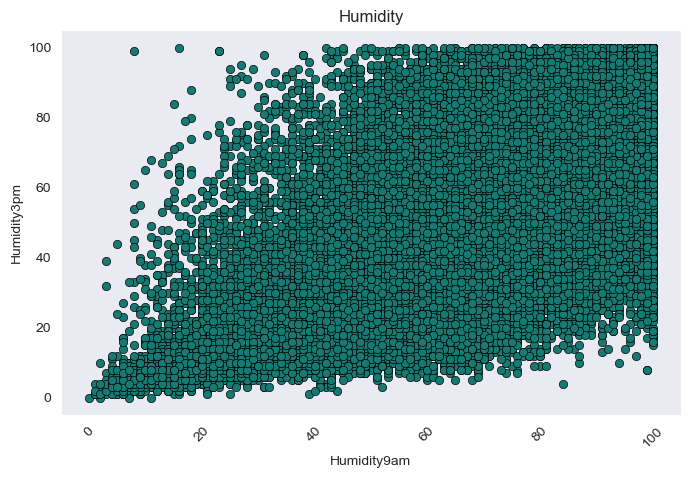

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Humidity9am'], y=df['Humidity3pm'], color=sns.color_palette('BrBG')[5], edgecolor='black')
plt.title("Humidity")
plt.xlabel('Humidity9am')
plt.ylabel('Humidity3pm')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In this case, we can see that there is a moderate correlation (0.67) but not as strong as the correlation between temperatures thoughtout the day.

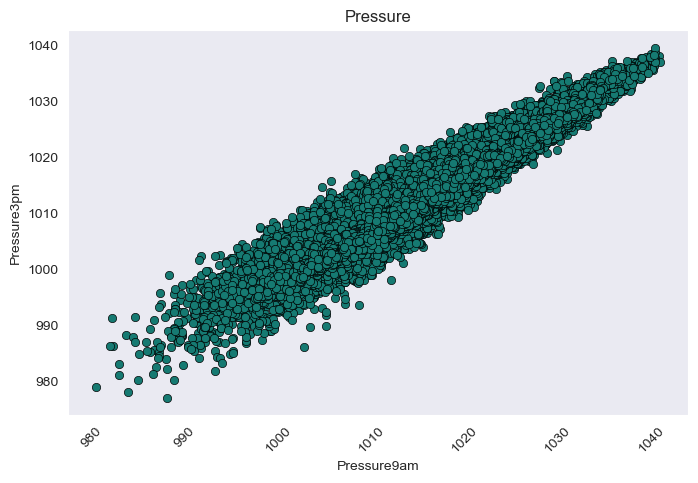

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Pressure9am'], y=df['Pressure3pm'], color=sns.color_palette('BrBG')[5], edgecolor='black')
plt.title("Pressure")
plt.xlabel('Pressure9am')
plt.ylabel('Pressure3pm')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In relation to the pressure we can see that the correlation is pretty high do to the fact that the graphic show us a strong linear association between the two variables.

#### Date Split

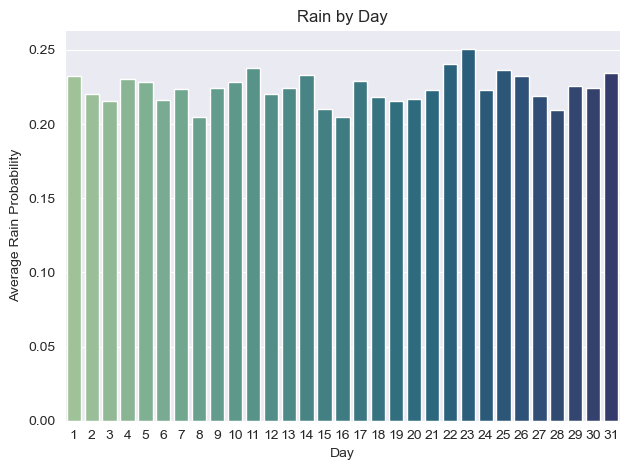

In [27]:
df_day = df.copy()
df_day.RainToday = df_day.RainToday.map({'No': 0, 'Yes': 1})
df_day.RainToday.value_counts(normalize=True)

df_day['day'] = df_day.Date.apply(lambda x: int(str(x)[8:10]))

sns.barplot(data=df_day, x='day', y='RainToday', estimator='mean', errorbar=None, palette='crest')
plt.title('Rain by Day')
plt.xlabel('Day')
plt.ylabel('Average Rain Probability')
plt.tight_layout()
plt.show()

The percentage of days that it rains is very similar so we can conclude this feature is not significant for modeling purposes.

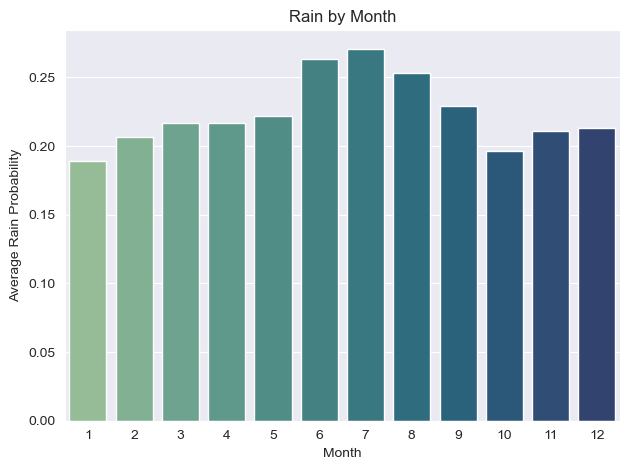

In [28]:
df_month = df.copy()
df_month.RainToday = df_month.RainToday.map({'No': 0, 'Yes': 1})
df_month.RainToday.value_counts(normalize=True)

df_month['month'] = df_month.Date.apply(lambda x: int(str(x)[5:7]))

sns.barplot(data=df_month, x='month', y='RainToday', estimator='mean', errorbar=None, palette='crest')
plt.title('Rain by Month')
plt.xlabel('Month')
plt.ylabel('Average Rain Probability')
plt.tight_layout()
plt.show()

Rainfall exhibits seasonality in many areas of the world. We can visualize a trend which indicates that the month of the year is a valuable piece of information for modeling purposes.